In [1]:
# Estudo de Caso 2 - Construindo Um Modelo de Decisão Para Risco de Crédito

# Obs: Caso tenha problemas com a acentuação, consulte este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

# Definindo o diretório de trabalho
getwd()
#setwd("~/Dropbox/DSA/MachineLearning2.0/Cap08/R")

[1] "C:/Users/cassi/OneDrive/Programação/DSA/MachineLearning2.0/Cap08-R"

In [2]:
# Calculando a entropia de duas classes
-0.60 * log2(0.60) - 0.40 * log2(0.40)

[1] 0.9709506

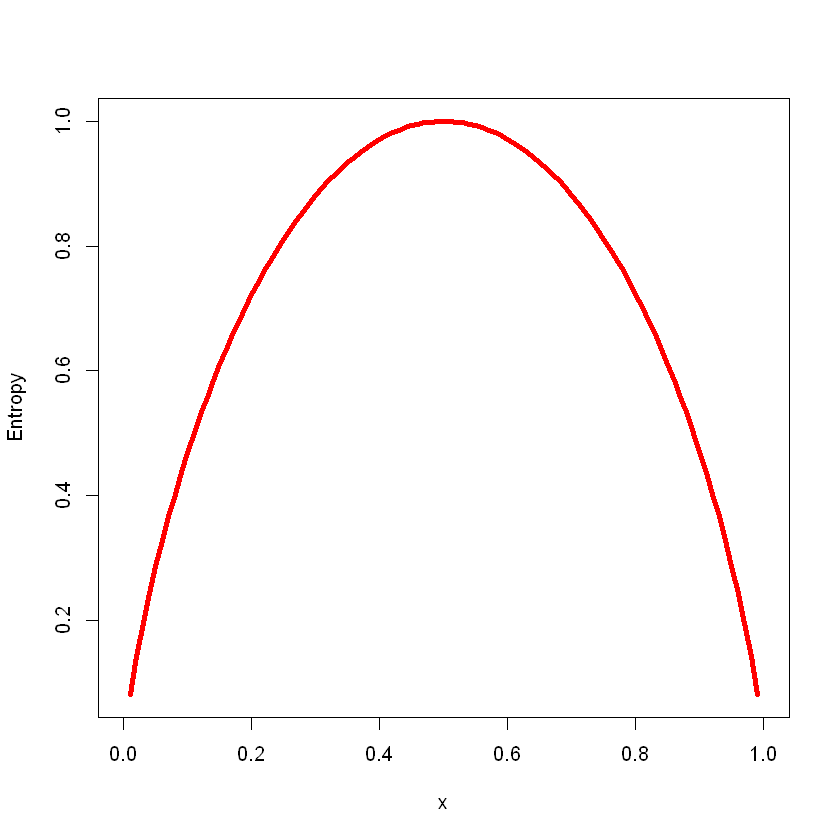

In [3]:
# Gerando a curva de Entropia
curve(-x * log2(x) - (1 - x) * log2(1 - x), col = "red", xlab = "x", ylab = "Entropy", lwd = 4)

In [5]:
# Identificando o risco de crédito
credit <- read.csv("dados/credito.csv")
str(credit)

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

In [6]:
head(credit)

checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no


In [7]:
# Verificando 2 atributos do cliente
table(credit$checking_balance)
table(credit$savings_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 


     < 100 DM     > 1000 DM  100 - 500 DM 500 - 1000 DM       unknown 
          603            48           103            63           183 

In [8]:
# Verificando as características do crédito
summary(credit$months_loan_duration)
summary(credit$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

In [9]:
# Variável target
table(credit$default)


 no yes 
700 300 

In [10]:
# Usando sample para construir os dados de treino e de teste
set.seed(123)
train_sample <- sample(1000, 900)

In [11]:
# Split dos dataframes
credit_train <- credit[train_sample, ]
credit_test  <- credit[-train_sample, ]

In [12]:
# Verificando a proporção da variável target
prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


       no       yes 
0.7055556 0.2944444 


  no  yes 
0.65 0.35 

In [13]:
# Construindo um modelo
install.packages("C50")
library(C50)
?C5.0

also installing the dependencies 'libcoin', 'mvtnorm', 'Formula', 'inum', 'partykit', 'Cubist'



package 'libcoin' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cassi\AppData\Local\Temp\RtmpmGZO3K\downloaded_packages


Warning message:
"package 'C50' was built under R version 3.6.3"

In [14]:
# Criando e visualizando o modelo
credit_model <- C5.0(credit_train[-17], credit_train$default)
credit_model


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 69 

Non-standard options: attempt to group attributes


In [15]:
# Informações detalhadas sobre a árvore
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Wed Oct 21 11:54:58 2020
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {car0,renovations}: yes (3)
    :       purpose = car:
    :       :...months_loan_duration <= 18: yes (5)
    :       :   months_loan_duration > 18:
   

In [16]:
# Avaliando a performance do modelo
credit_pred <- predict(credit_model, credit_test)

In [17]:
# Confusion Matrix para comparar valores observados e valores previstos
install.packages("gmodels")
library(gmodels)

package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cassi\AppData\Local\Temp\RtmpmGZO3K\downloaded_packages


Warning message:
"package 'gmodels' was built under R version 3.6.3"

In [18]:
# Criando a Confusion Matrix
?CrossTable
CrossTable(credit_test$default, 
           credit_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Previsto 
   Observado |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |        55 |        10 |        65 | 
             |     0.550 |     0.100 |           | 
-------------|-----------|-----------|-----------|
         yes |        20 |        15 |        35 | 
             |     0.200 |     0.150 |           | 
-------------|-----------|-----------|-----------|
Column Total |        75 |        25 |       100 | 
-------------|-----------|-----------|-----------|

 


## Melhorando a performance do modelo

In [20]:
# Aumentando a precisão com 10 tentativas
credit_boost10 <- C5.0(credit_train[-17], credit_train$default, trials = 10)
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 56.6 

Non-standard options: attempt to group attributes


In [21]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Oct 21 12:00:04 2020
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {car0,renovations}: yes (3)
    :       purpose = car:
    :       :...months_loan_duration <= 18: yes (5)
    :    

In [22]:
# Score do modelo
credit_boost_pred10 <- predict(credit_boost10, credit_test)

In [23]:
# Confusion Matrix
CrossTable(credit_test$default, 
           credit_boost_pred10,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Previsto 
   Observado |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |        52 |        13 |        65 | 
             |     0.520 |     0.130 |           | 
-------------|-----------|-----------|-----------|
         yes |        17 |        18 |        35 | 
             |     0.170 |     0.180 |           | 
-------------|-----------|-----------|-----------|
Column Total |        69 |        31 |       100 | 
-------------|-----------|-----------|-----------|

 


## Dando pesos aos erros

In [24]:
# Criando uma matriz de dimensões de custo
matrix_dimensions <- list(c("no", "yes"), c("no", "yes"))
names(matrix_dimensions) <- c("Previsto", "Observado")
matrix_dimensions

$Previsto
[1] "no"  "yes"

$Observado
[1] "no"  "yes"

In [25]:
# Construindo a matriz
error_cost <- matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix_dimensions)
error_cost

,no,yes
no,0,4
yes,1,0


In [26]:
# Aplicando a matriz a árvore
?C5.0
credit_cost <- C5.0(credit_train[-17], credit_train$default, costs = error_cost)

In [27]:
# Score do modelo
credit_cost_pred <- predict(credit_cost, credit_test)

In [28]:
# Confusion Matrix
CrossTable(credit_test$default, 
           credit_cost_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Previsto 
   Observado |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |        39 |        26 |        65 | 
             |     0.390 |     0.260 |           | 
-------------|-----------|-----------|-----------|
         yes |         7 |        28 |        35 | 
             |     0.070 |     0.280 |           | 
-------------|-----------|-----------|-----------|
Column Total |        46 |        54 |       100 | 
-------------|-----------|-----------|-----------|

 
